In [ ]:
! rm daily.csv* && wget https://covidtracking.com/api/us/daily.csv .

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
x = pd.read_csv("daily.csv.1")
x['date']=pd.to_datetime(x['date'],format='%Y%m%d')
x.set_index(['date'],inplace=True)

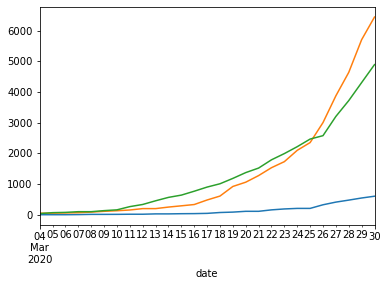

In [16]:
x[x['state'] == 'OR']['positive'].plot()
x[x['state'] == 'CA']['positive'].plot()
x[x['state'] == 'WA']['positive'].plot()


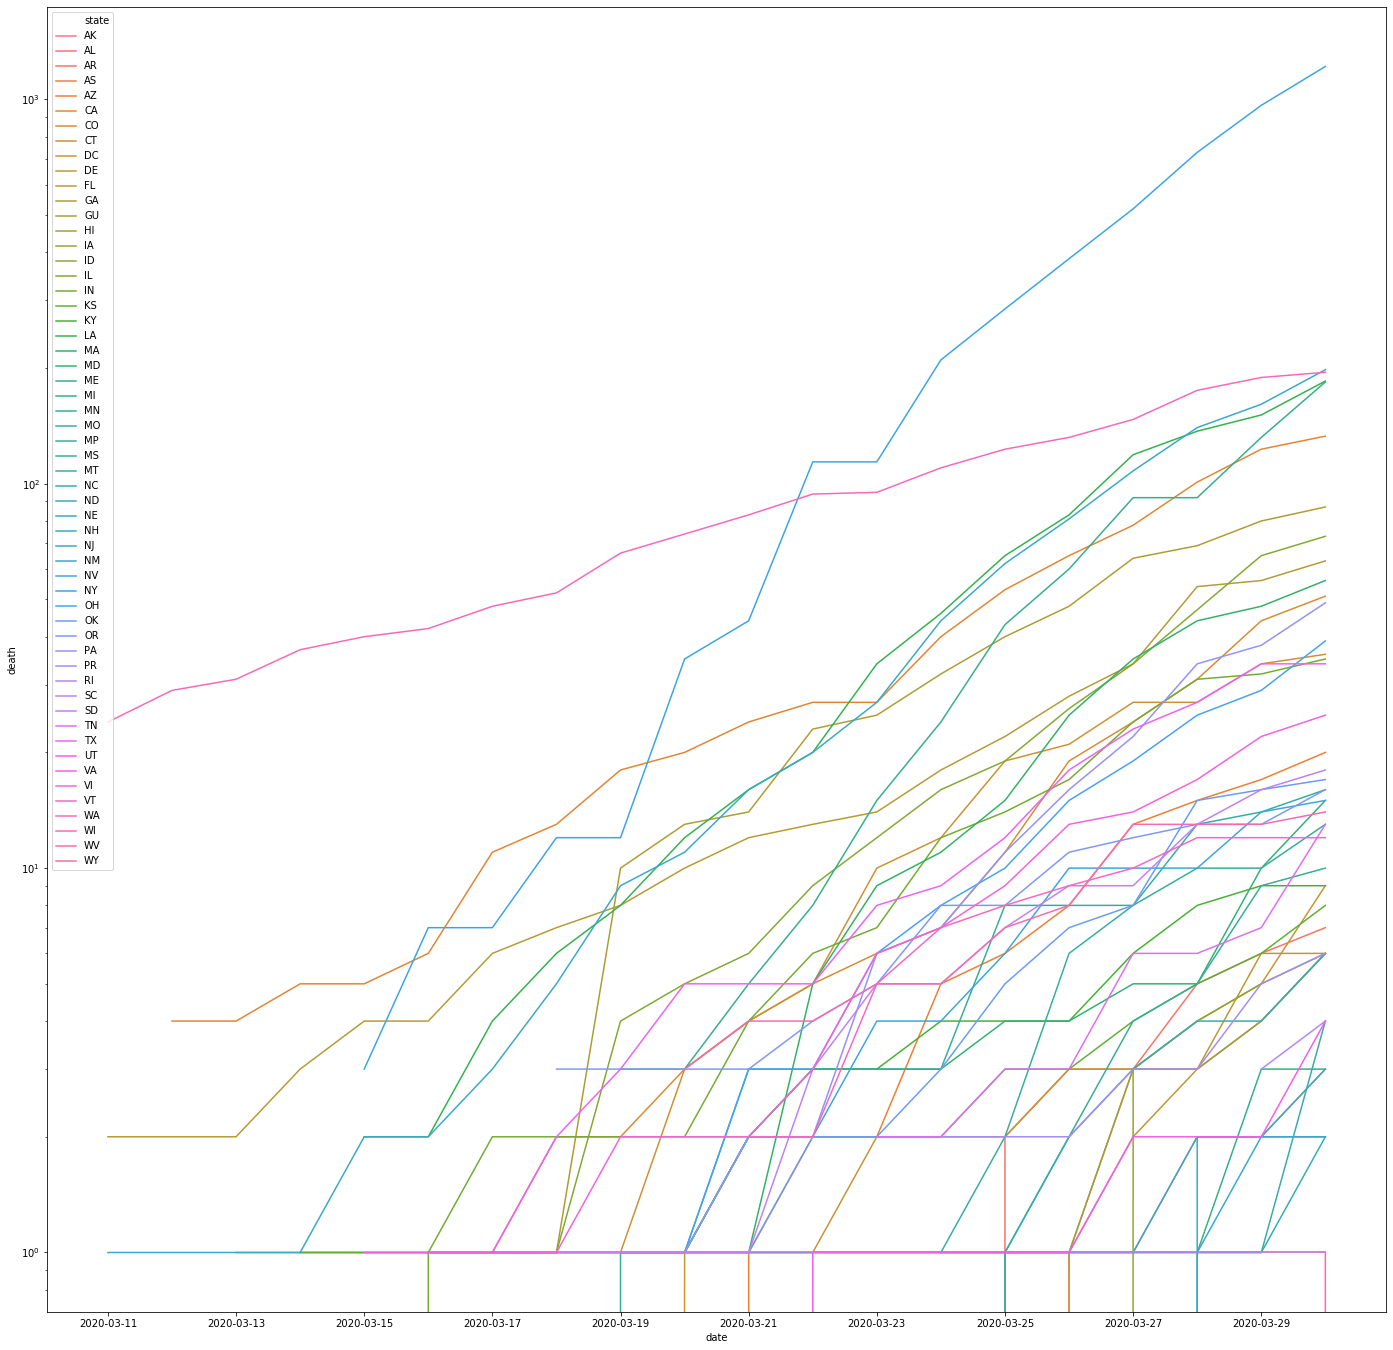

In [40]:
import seaborn as sns
f, ax = plt.subplots(figsize=(24, 24))
ax.set(yscale="log")
sns.lineplot(x=x.index,y=x['death'],hue=x['state'], ax=ax)

In [29]:
x.index


DatetimeIndex(['2020-03-30', '2020-03-30', '2020-03-30', '2020-03-30',
               '2020-03-30', '2020-03-30', '2020-03-30', '2020-03-30',
               '2020-03-30', '2020-03-30',
               ...
               '2020-03-04', '2020-03-04', '2020-03-04', '2020-03-04',
               '2020-03-04', '2020-03-04', '2020-03-04', '2020-03-04',
               '2020-03-04', '2020-03-04'],
              dtype='datetime64[ns]', name='date', length=1373, freq=None)